## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import dataframes

In [2]:
df_beer_reviews = pd.read_csv(r'Data\beer_reviews.csv')

## Understanding

To facilitate clustering and natural language processing, an additional column needs to be introduced. This column will indicate whether the user's review is positive or negative, derived from the user's overall review. To achieve this, it is necessary to calculate the mean score that the user assigned to all the different aspects of their review.

In [3]:
df_beer_reviews.columns

Index(['index', 'brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
df_beer_reviews.head(1)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986.0


In [5]:
df_beer_reviews.groupby(df_beer_reviews['review_aroma'])['review_aroma'].count()

review_aroma
1.0      1877
1.5      3512
2.0     12636
2.5     20088
3.0     61426
3.5    113585
4.0    177993
4.5     88920
5.0     21139
Name: review_aroma, dtype: int64

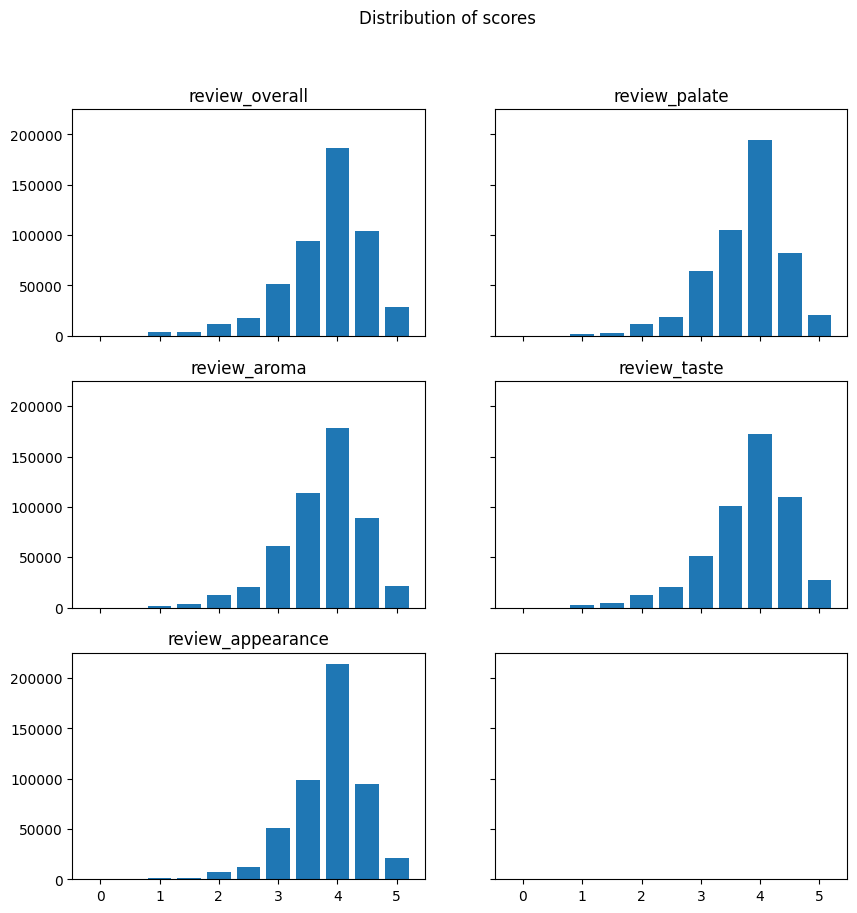

In [6]:
cols = ['review_overall', 
        'review_aroma', 
        'review_appearance', 
        'review_palate', 
        'review_taste']
col_num = 0
row_num = 0

fig, ax = plt.subplots(ncols=2, 
                       nrows=3, 
                       figsize=[10,10],
                       sharey=True,
                       sharex=True)
fig.suptitle('Distribution of scores')

for col in cols:
        review_amount = df_beer_reviews.groupby(df_beer_reviews[col])[col].count().to_dict()
        scores = sorted(df_beer_reviews[col].unique().tolist())
        review_amount = [review_amount.get(score, 0) for score in scores]

        ax[row_num, col_num].bar(x=scores, 
                                 height=review_amount,
                                 width=0.4)
        ax[row_num, col_num].set_title(col)
        row_num+=1
        if row_num>2: 
                col_num+=1
                row_num=0

In [7]:
def isPositive(row):
    threshold = 3.0
    mean_score = (row['review_overall'] + row['review_aroma'] + row['review_appearance'] + row['review_palate'] + row['review_taste']) / 5
    return 1 if mean_score > threshold else 0

In [8]:
df_beer_reviews['isPositive'] = df_beer_reviews.apply(isPositive, axis=1)

In [9]:
df_beer_reviews.groupby(df_beer_reviews['isPositive'])['isPositive'].count()

isPositive
0     50429
1    450748
Name: isPositive, dtype: int64

In [17]:
df_beer_reviews.to_csv(r'Data/Beer_cleaned.csv')